## Data Preparation

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import os
import pandas as pd
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [6]:
train = pd.read_csv("D:/Documents/CVPR/DataSets/Kannada-MNIST/train.csv")

train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test = pd.read_csv("D:/Documents/CVPR/DataSets/Kannada-MNIST/test.csv")

test.tail()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4995,4995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,4996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,4997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,4998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4999,4999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x_train = train.iloc[:, 1:].to_numpy()
y_train = train.iloc[:, 0].to_numpy()

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [9]:
x_test = test.iloc[:, 1:].to_numpy()
y_test = test.iloc[:, 0].to_numpy()

print(x_test.shape)
print(y_test.shape)

(5000, 784)
(5000,)


## Normalise Data

In [13]:
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(5000, 28, 28, 1)


## Validation Split

In [29]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)


## Sample Data

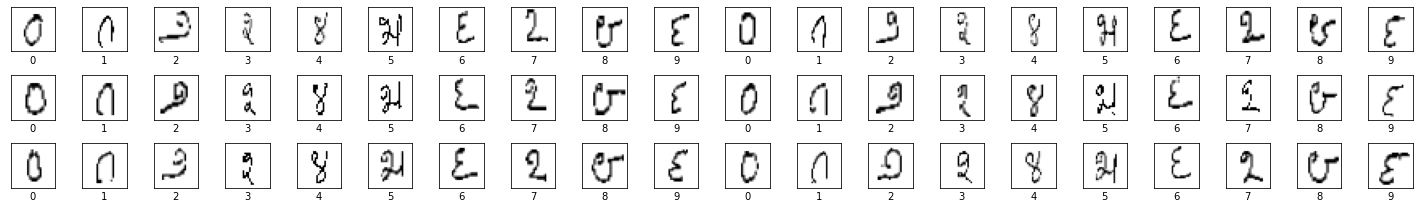

This is a 3


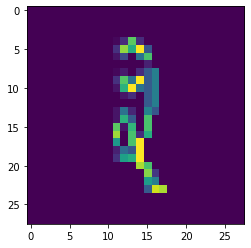

In [26]:
i = 0
plt.figure(figsize=(20,3))
for i in range(60):
    plt.subplot(3, 20, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
plt.tight_layout()
plt.show()

## Data Augmentation

In [20]:
datagen = ImageDataGenerator(
    rotation_range=12,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

## CNN Model

In [17]:
model = keras.Sequential([
    keras.Input(shape=x_train.shape[1:]),
    layers.Conv2D(filters=32, kernel_size=(5,5),strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2),strides=(1,1), padding='same'),
    layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2),strides=(1,1), padding='same'),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [18]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

## Train

In [30]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

h = model.fit(datagen.flow(x_train, y_train, batch_size=64), 
              epochs=20, 
              validation_data=(x_val,y_val),
              callbacks=[cb]
             )

D:\Python\envs\cvpr\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
750/750 [==============================] - 113s 148ms/step - loss: 0.5902 - accuracy: 0.8032 - val_loss: 0.0329 - val_accuracy: 0.9902
Epoch 2/20
750/750 [==============================] - 118s 158ms/step - loss: 0.1526 - accuracy: 0.9539 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 3/20
582/750 [======================>.......] - ETA: 25s - loss: 0.1203 - accuracy: 0.9643

KeyboardInterrupt: 

## Ploting the Training result

NameError: name 'h' is not defined

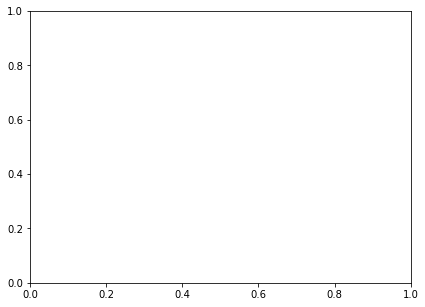

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

## Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)